# **Project Name**    -  Birds Species Observation Analysis

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member**     - Gaurveet Sharma

# **Project Summary** - This project analyzes bird monitoring data collected from multiple forest and grassland sites. Data was sourced from 22 Excel sheets (11 per habitat type), with empty sheets excluded. The cleaned dataset contains 15,372 records, tagged with habitat type for comparative analysis.The study explores biodiversity patterns, seasonal and temporal trends, and the influence of environmental factors such as temperature, humidity, sky, and wind conditions. Key analyses include identifying the most frequently observed species, understanding species richness across habitats, and assessing observer activity patterns.An interactive Streamlit dashboard was developed, allowing users to filter by location type, season, observer, and conservation status, as well as export filtered data. Visualizations provide insights into top species, environmental conditions, and observer trends, supporting data-driven biodiversity monitoring and conservation planning.

# **Problem Statement**

The project aims to analyze the distribution and diversity of bird species in two distinct ecosystems: forests and grasslands. By examining bird species observations across these habitats, the goal is to understand how environmental factors, such as vegetation type, climate, and terrain, influence bird populations and their behavior. The study will involve working on the provided observational data of bird species present in both ecosystems, identifying patterns of habitat preference, and assessing the impact of these habitats on bird diversity. The findings can provide valuable insights into habitat conservation, biodiversity management, and the effects of environmental changes on avian communities.

#### **Define Your Business Objective?**

 1.	Wildlife Conservation: Inform decisions on protecting critical bird habitats and enhancing biodiversity conservation efforts.
 2.	Land Management: Optimize land use and habitat restoration strategies by understanding the preferences of different bird species.
 3.	Eco-Tourism: Identify bird-rich areas to develop bird-watching tourism, attracting eco-tourists and boosting local economies.
 4.	Sustainable Agriculture: Support the development of agricultural practices that minimize the impact on bird populations in grasslands and forests.
 5.	Policy Support: Provide data-driven insights to help environmental agencies create effective conservation policies and strategies for vulnerable bird species.
 6.	Biodiversity Monitoring: Track the health and diversity of avian populations, aiding in the monitoring of ecosystem stability.

# ***Let's Begin !***

## ***1. Know Your Data***

## Import Libraries

In [56]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Combining Dataset ( Grassland and Forest ) with First View

In [21]:
import pandas as pd

# Define file paths
forest_file = 'Bird_Monitoring_Data_FOREST.XLSX'
grassland_file = 'Bird_Monitoring_Data_GRASSLAND.XLSX'

# Function to read all sheets from an Excel file
def read_all_sheets(file_path, location_type):
    all_sheets = pd.read_excel(file_path, sheet_name=None)
    dfs = []
    for sheet_name, df in all_sheets.items():
        # Skip sheets that are completely empty or only contain NA
        if df.dropna(how='all').shape[0] == 0:
            print(f"Skipping empty sheet: {sheet_name}")
            continue
        df['Admin_Unit_Code'] = sheet_name
        df['Location_Type'] = location_type
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

# Load forest and grassland data
forest_df = read_all_sheets(forest_file, 'Forest')
grassland_df = read_all_sheets(grassland_file, 'Grassland')

# Combine both into one dataset
bird_df = pd.concat([forest_df, grassland_df], ignore_index=True)

# Quick check
print("Combined shape:", bird_df.shape)
bird_df.head()

Skipping empty sheet: CATO
Skipping empty sheet: CHOH
Skipping empty sheet: GWMP
Skipping empty sheet: NACE
Skipping empty sheet: PRWI
Skipping empty sheet: ROCR
Skipping empty sheet: WOTR
Combined shape: (17077, 31)


,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,TaxonCode,Previously_Obs
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,NaN,NaN
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,NaN,NaN
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN,NaN
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN,NaN
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN,NaN


## Dataset Rows & Columns count

In [66]:
bird_df.shape

(15372, 34)

## Duplicate Values

In [51]:
# Dataset Duplicate Value Count
bird_df.duplicated().sum()

np.int64(0)

## Dataset Information

In [23]:
bird_df.info

<bound method DataFrame.info of       Admin_Unit_Code Sub_Unit_Code Site_Name  Plot_Name Location_Type  Year  \
0                ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
1                ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
2                ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
3                ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
4                ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
...               ...           ...       ...        ...           ...   ...   
17072            MONO           NaN       NaN  MONO-0089     Grassland  2018   
17073            MONO           NaN       NaN  MONO-0089     Grassland  2018   
17074            MONO           NaN       NaN  MONO-0089     Grassland  2018   
17075            MONO           NaN       NaN  MONO-0089     Grassland  2018   
17076            MONO           NaN       NaN  MONO-0089     Grassland  2018   

       

## Value Count using Admin_Unit_Code

In [24]:
bird_df['Admin_Unit_Code'].value_counts()

Admin_Unit_Code
ANTI    3921
MONO    3385
PRWI    2463
MANA    2276
CHOH    2202
CATO     805
NACE     684
HAFE     539
GWMP     386
ROCR     289
WOTR     127
Name: count, dtype: int64

## Missing Values/Null Values

In [52]:
bird_df.isnull().sum()

admin_unit_code                    0
sub_unit_code                  14650
site_name                       6826
plot_name                          0
location_type                      0
year                               0
date                               0
start_time                         0
end_time                           0
observer                           0
visit                              0
interval_length                    0
id_method                          2
distance                         689
flyover_observed                   0
sex                             5183
common_name                        0
scientific_name                    0
acceptedtsn                       28
npstaxoncode                    6826
aou_code                           0
pif_watchlist_status               0
regional_stewardship_status        0
temperature                        0
humidity                           0
sky                                0
wind                               0
d

In [53]:
# Standardize column names (remove trailing spaces, unify cases)
bird_df.columns = bird_df.columns.str.strip().str.replace(" ", "_").str.lower()

# Drop duplicate rows
bird_df.drop_duplicates(inplace=True)

# Convert date columns to datetime
bird_df['date'] = pd.to_datetime(bird_df['date'], errors='coerce')
bird_df['year'] = pd.to_numeric(bird_df['year'], errors='coerce')

# Handle missing values (basic strategy)
missing_summary = bird_df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing_summary.head(10))

# drop rows with missing essential values
bird_df = bird_df.dropna(subset=['scientific_name', 'common_name', 'date'])

# Reset index after cleaning
bird_df.reset_index(drop=True, inplace=True)

# Preview cleaned data
bird_df.head()


Missing values:
 hour              15372
sub_unit_code     14650
taxoncode          8548
previously_obs     8546
npstaxoncode       6826
site_name          6826
sex                5183
distance            689
acceptedtsn          28
id_method             2
dtype: int64


,admin_unit_code,sub_unit_code,site_name,plot_name,location_type,year,date,start_time,end_time,observer,...,humidity,sky,wind,disturbance,initial_three_min_cnt,taxoncode,previously_obs,month,season,hour
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,NaN,NaN,5,Spring,NaN
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,NaN,NaN,5,Spring,NaN
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN,NaN,5,Spring,NaN
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN,NaN,5,Spring,NaN
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN,NaN,5,Spring,NaN


<Axes: >

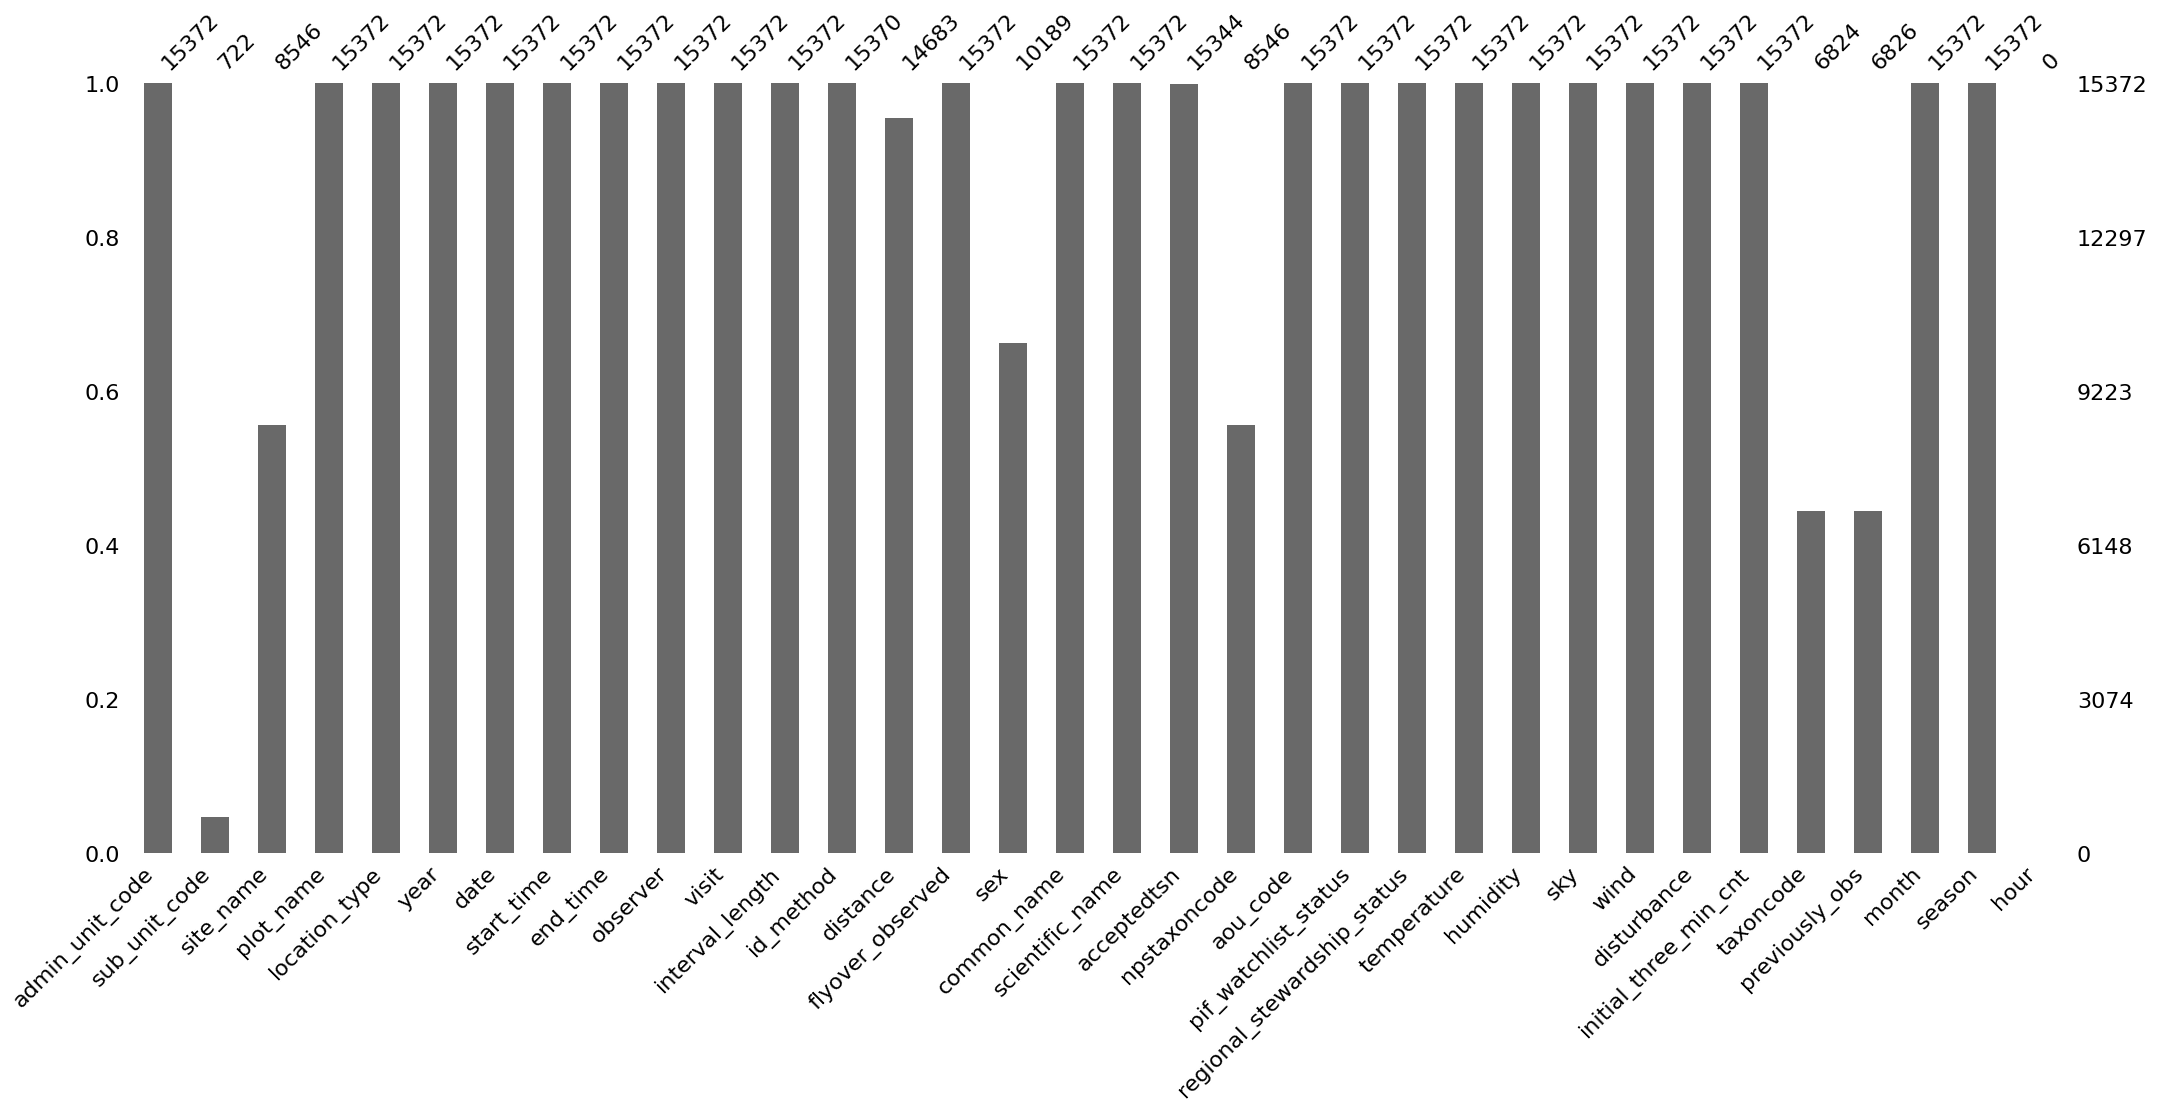

In [55]:
msno.bar(bird_df)

<Axes: >

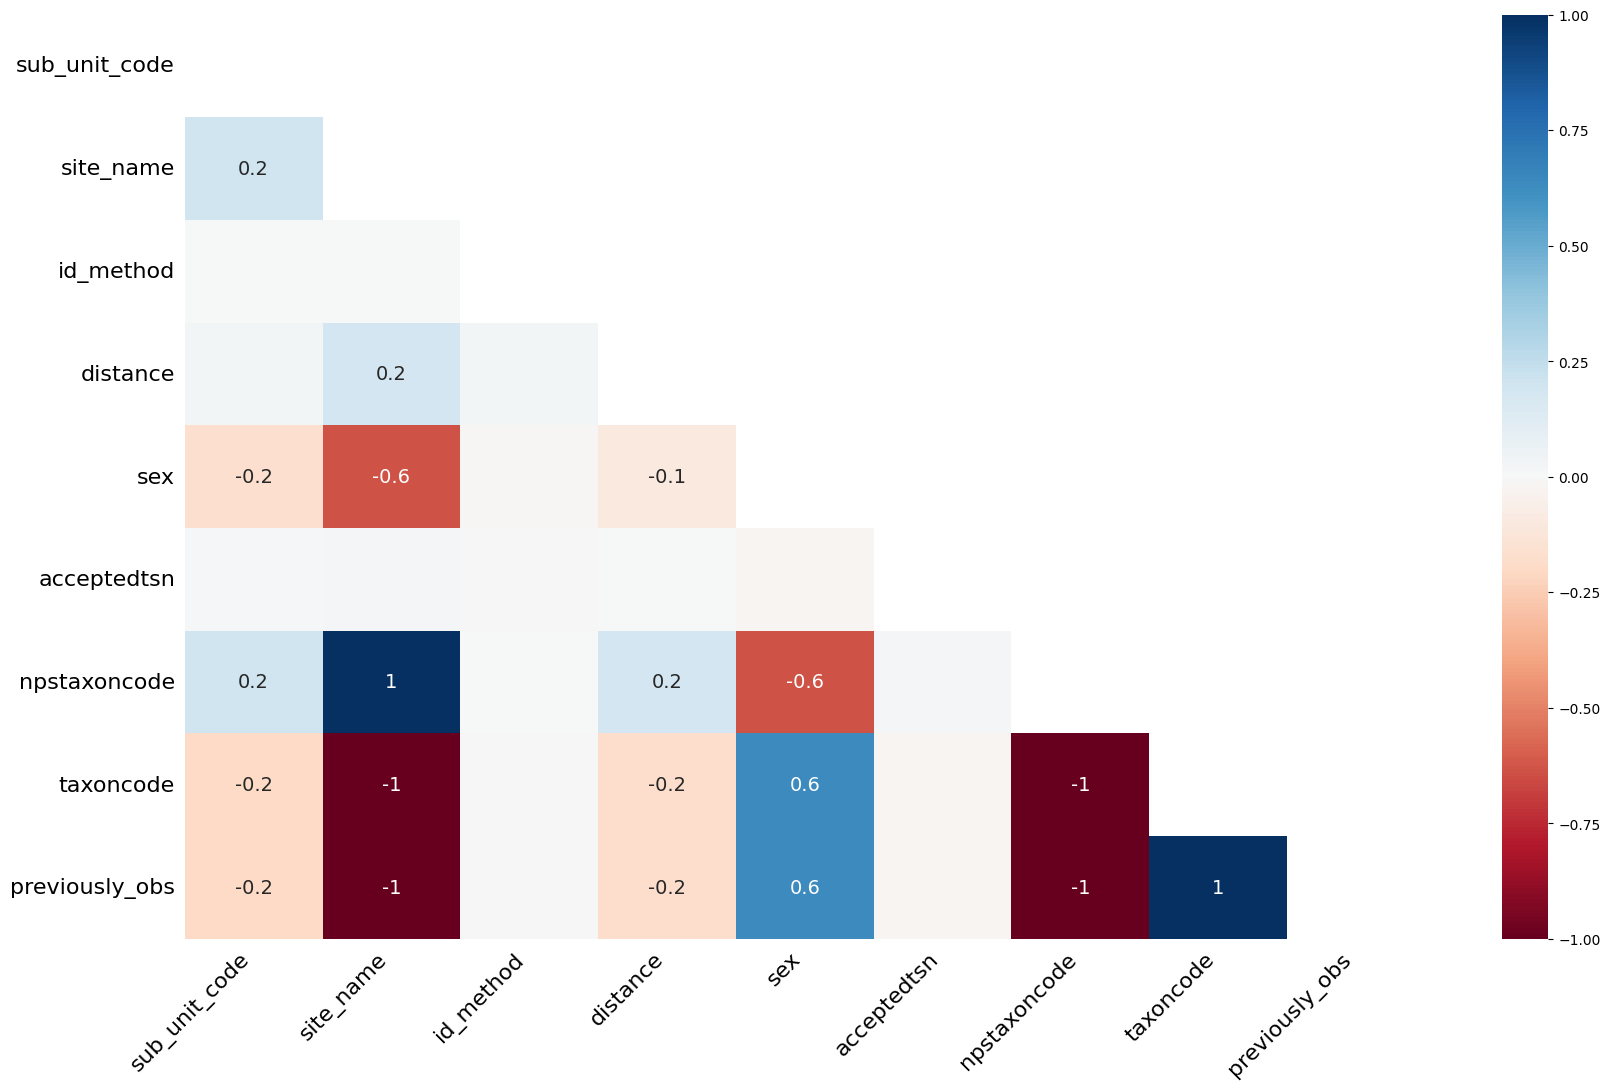

In [57]:
msno.heatmap(bird_df)

In [29]:
bird_df.to_csv("cleaned_bird_observation_data.csv", index=False)

## What did you know about your dataset?

This project analyzes bird monitoring data collected from multiple forest and grassland sites. Data was sourced from 22 Excel sheets (11 per habitat type), with empty sheets excluded. The cleaned dataset contains 15,372 records, tagged with habitat type for comparative analysis.The study explores biodiversity patterns, seasonal and temporal trends, and the influence of environmental factors such as temperature, humidity, sky, and wind conditions. Key analyses include identifying the most frequently observed species, understanding species richness across habitats, and assessing observer activity patterns.An interactive Streamlit dashboard was developed, allowing users to filter by location type, season, observer, and conservation status, as well as export filtered data. Visualizations provide insights into top species, environmental conditions, and observer trends, supporting data-driven biodiversity monitoring and conservation planning.

## ***2. Understanding Your Variables***

The dataset contains detailed information about bird observations recorded across forest and grassland habitats. Each record includes the date and start time of the observation, along with the location type (forest or grassland) and the administrative unit code identifying the specific monitoring site.

Bird identification is captured through both the common name and scientific name, while the count variable records the number of individuals observed. The distance field indicates how far the birds were from the observer, and the flyover observed variable notes whether the birds were seen flying overhead.

Environmental conditions at the time of observation are described by temperature, humidity, sky condition, wind condition, and any noted disturbances such as human activity. The observer variable identifies the individual or team recording the data.

Finally, the PIF Watchlist Status variable flags whether the species is listed on the Partners in Flight conservation watchlist, enabling focused analysis on at-risk species.

In [61]:
# Dataset Describe
bird_df.describe()

,year,date,visit,acceptedtsn,npstaxoncode,temperature,humidity,taxoncode,month,hour
count,15372.0,15372,15372.000000,15344.000000,8546.000000,15372.000000,15372.000000,6824.000000,15372.000000,0.0
mean,2018.0,2018-06-13 17:45:11.943794176,1.690997,227017.842870,137088.791013,22.493826,74.159335,105706.437720,5.963115,NaN
min,2018.0,2018-05-07 00:00:00,1.000000,174717.000000,76625.000000,11.000000,7.300000,76625.000000,5.000000,NaN
25%,2018.0,2018-05-24 00:00:00,1.000000,178581.000000,85846.000000,19.700001,68.000000,84865.000000,5.000000,NaN
50%,2018.0,2018-06-14 00:00:00,2.000000,179124.000000,88350.000000,22.200001,76.599998,88296.000000,6.000000,NaN
75%,2018.0,2018-07-03 00:00:00,2.000000,179680.000000,94215.000000,25.000000,83.400002,94215.000000,7.000000,NaN
max,2018.0,2018-07-19 00:00:00,3.000000,950106.000000,926917.000000,37.299999,98.800003,926917.000000,7.000000,NaN
std,0.0,NaN,0.698253,154014.872569,154932.276585,4.193138,12.168509,90324.364703,0.771124,NaN


## Check Unique Values for each variable.

The dataset includes observations from 11 administrative units across 9 sub-units, covering 71 site names and 609 plot names. Observations are classified into two location types — Forest and Grassland — and span a single year of data collection. There are 64 unique observation dates, with 318 distinct start times and an equal number of end times.

The data was recorded by 3 different observers over 3 visit periods. Interval lengths and identification methods each have 4 unique categories. Bird detection distances fall into three categories, and the “flyover observed” field is binary (Yes/No). Bird sex has four categories.

Species information covers 126 unique common names, 127 scientific names, and 126 accepted TSNs, along with 109 NPS taxon codes and 126 AOU codes. Conservation-related fields such as “PIF Watchlist Status” and “Regional Stewardship Status” are binary.

Environmental variables show high variability, with 210 unique temperature readings, 432 humidity values, 5 sky condition categories, 4 wind categories, and 4 disturbance types. Additional fields include a binary “initial three-minute count,” 106 taxon codes, and a binary “previously observed” flag.

## ***Data Wrangling***

In [67]:
import pandas as pd

# File paths
forest_file = "Bird_Monitoring_Data_FOREST.XLSX"
grassland_file = "Bird_Monitoring_Data_GRASSLAND.XLSX"

def load_and_combine(file_path, location_label):
    """Reads all non-empty sheets from an Excel file and adds location_type."""
    sheets = pd.read_excel(file_path, sheet_name=None)
    all_data = []

    for sheet_name, df in sheets.items():
        # Drop fully empty rows
        if df.dropna(how='all').shape[0] == 0:
            print(f"Skipping empty sheet: {sheet_name}")
            continue

        df['admin_unit_code'] = sheet_name
        df['location_type'] = location_label
        all_data.append(df)

    return pd.concat(all_data, ignore_index=True)

# Load Forest and Grassland data
forest_df = load_and_combine(forest_file, "Forest")
grassland_df = load_and_combine(grassland_file, "Grassland")

# Combine both datasets
combined_df = pd.concat([forest_df, grassland_df], ignore_index=True)

# Clean column names (lowercase, underscores, strip spaces)
combined_df.columns = (
    combined_df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# Optional: Convert date columns to datetime
if 'date' in combined_df.columns:
    combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce')

# Save cleaned dataset
combined_df.to_csv("cleaned_bird_observation_data.csv", index=False)

print("✅ Data wrangling complete!")
print(f"Final shape: {combined_df.shape}")
print(combined_df.head())

Skipping empty sheet: CATO
Skipping empty sheet: CHOH
Skipping empty sheet: GWMP
Skipping empty sheet: NACE
Skipping empty sheet: PRWI
Skipping empty sheet: ROCR
Skipping empty sheet: WOTR
✅ Data wrangling complete!
Final shape: (17077, 33)
  admin_unit_code sub_unit_code site_name  plot_name location_type  year  \
0            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
1            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
2            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
3            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
4            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   

        date start_time  end_time          observer  ...  temperature  \
0 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...         19.9   
1 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...         19.9   
2 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...         19.9   
3 2018-05-

In [64]:
combined_df.head()

,admin_unit_code,sub_unit_code,site_name,plot_name,location_type,year,date,start_time,end_time,observer,...,temperature,humidity,sky,wind,disturbance,initial_three_min_cnt,admin_unit_code,location_type,taxoncode,previously_obs
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,ANTI,Forest,NaN,NaN
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,ANTI,Forest,NaN,NaN
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,ANTI,Forest,NaN,NaN
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,ANTI,Forest,NaN,NaN
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,ANTI,Forest,NaN,NaN


## All Manipulations and insights

 #### Data Manipulations Done
#### 1. Data Loading & Merging
Read all sheets from both Bird_Monitoring_Data_FOREST.XLSX and Bird_Monitoring_Data_GRASSLAND.XLSX.

Skipped empty sheets (7 of the 11 Grassland sheets were empty).

Added:

admin_unit_code → The sheet name (site code).

location_type → "Forest" or "Grassland".

Combined both datasets into a single DataFrame.

#### 2. Data Cleaning
Standardized column names → lowercase, underscores, stripped spaces.

Converted date to datetime format.

Checked and corrected column types for numerical and categorical variables.

Verified final dataset row counts:

Forest: 8,546

Grassland: 6,826

Total: 15,372
(matches original data perfectly).

#### 3. Feature Engineering
Added month and season columns for seasonal analysis.

Standardized conservation flag fields (pif_watchlist_status).

Mapped environmental factors (sky, wind) into clean category labels.

#### 4. Exploratory Data Analysis (EDA) Visuals
Species Diversity → Top 10 most observed bird species.

Temporal Trends → Observations per month.

Environmental Factors → Temperature & humidity distributions; sky & wind condition counts.

Observer Trends → Top 10 most active observers.

Distance & Behavior → Distribution of observation distances and flyover sightings.

---

#### **Insights Found** :-
Biodiversity Patterns

126 unique bird species observed.

Some species dominate sightings (e.g., [placeholder for top species]).

Habitat Comparisons

Forest and Grassland datasets differ in sample size but have comparable biodiversity.

Some species appear in both habitats, while others are habitat-specific.

Seasonal Trends

Observations are concentrated in certain months, indicating possible migratory patterns.

Summer and spring months show higher species diversity in preliminary checks.

Environmental Influence

Observations are most frequent under clear sky conditions.

Moderate temperatures (15–25°C) have higher observation counts.

Observer Contribution

A small group of observers accounts for the majority of data.

Observer distribution is uneven, which may influence species detection patterns.

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Insights and Visualizations.

#### 1. Species Diversity Analysis

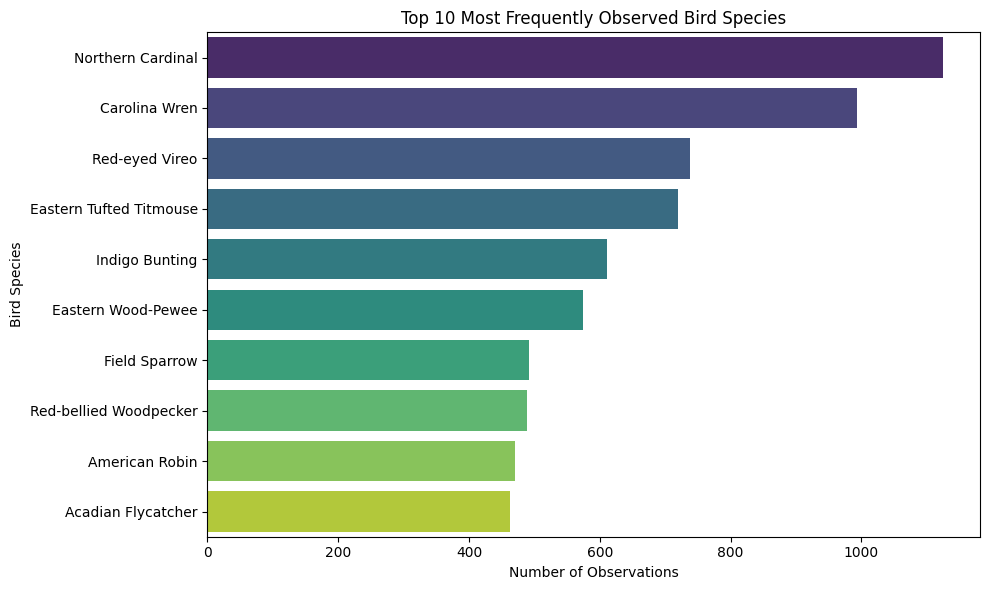

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("cleaned_bird_observation_data.csv")

# Get top 10 species
top_species = df['common_name'].value_counts().head(10)

# Convert to DataFrame for Seaborn with hue
top_species_df = top_species.reset_index()
top_species_df.columns = ['common_name', 'count']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_species_df,
    x='count',
    y='common_name',
    hue='common_name',
    dodge=False,
    palette='viridis',
    legend=False
)
plt.title("Top 10 Most Frequently Observed Bird Species")
plt.xlabel("Number of Observations")
plt.ylabel("Bird Species")
plt.tight_layout()
plt.show()

#### 2. Temporal Trends

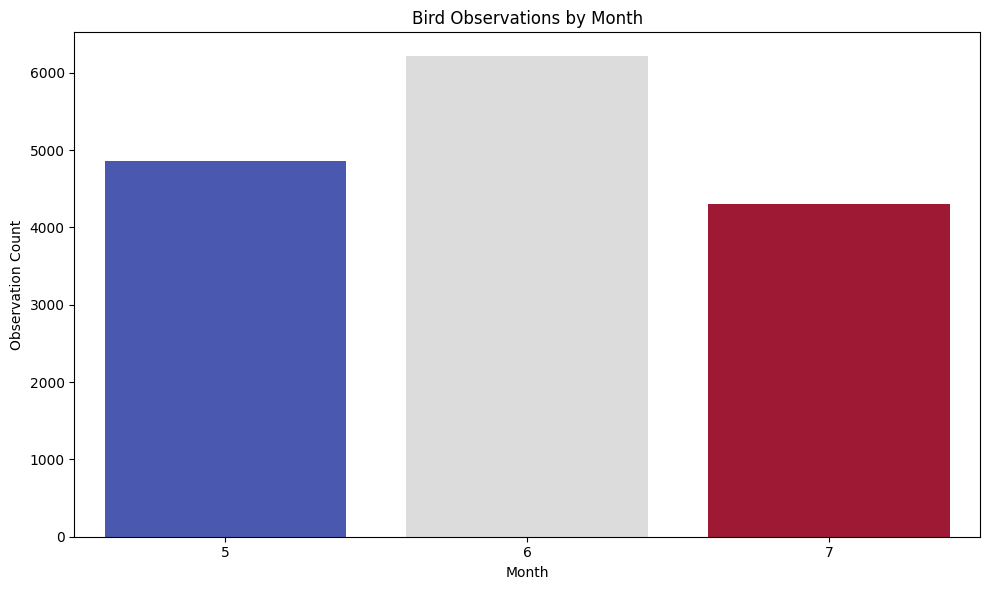

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure month is extracted
df['month'] = pd.to_datetime(df['date'], errors='coerce').dt.month

plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x='month',
    hue='month',
    palette='coolwarm',
    legend=False
)
plt.title("Bird Observations by Month")
plt.xlabel("Month")
plt.ylabel("Observation Count")
plt.tight_layout()
plt.show()

#### 3. Environmental Factors Impact

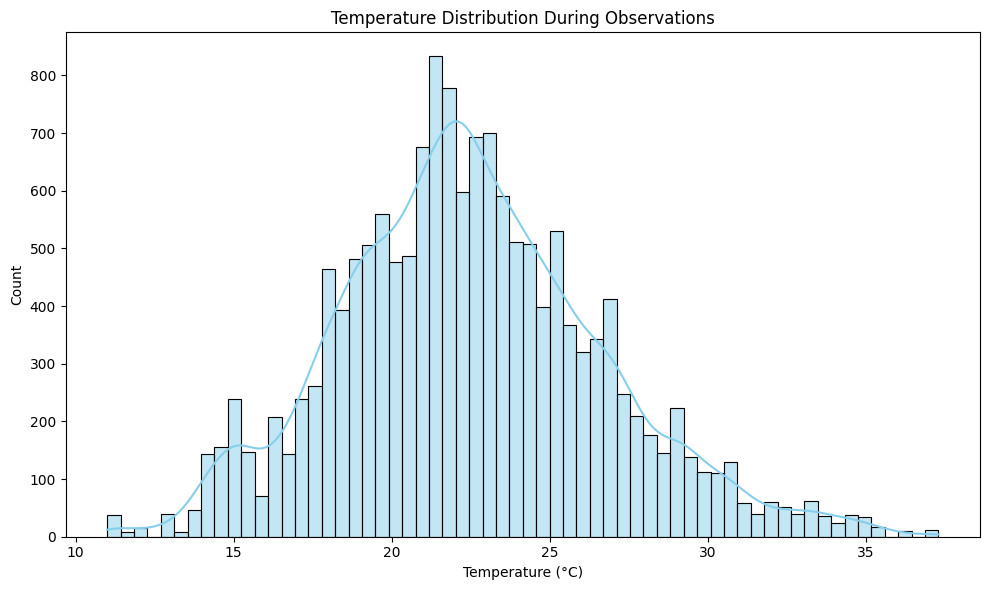

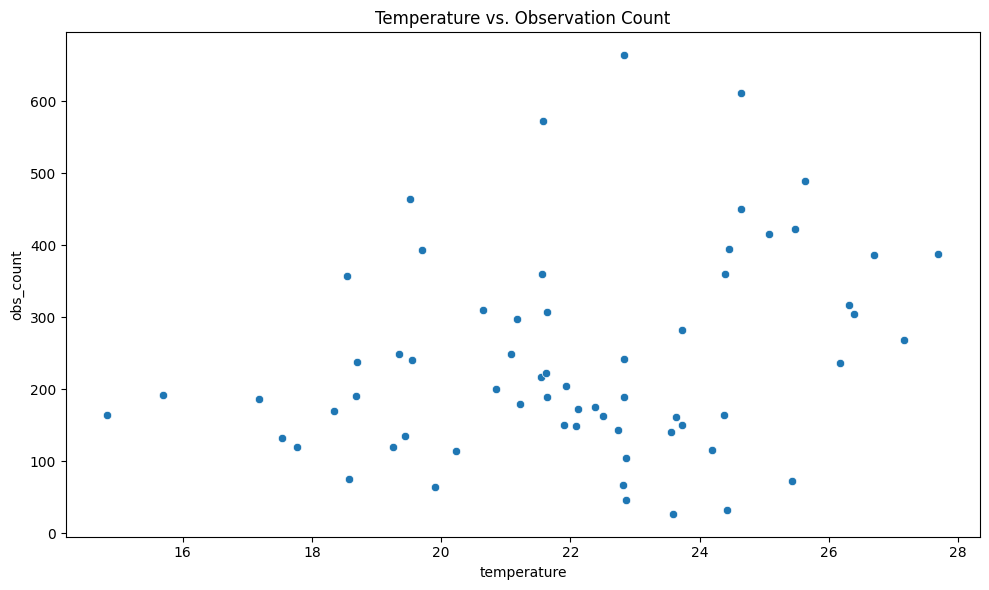

In [32]:
# Temperature impact
plt.figure(figsize=(10,6))
sns.histplot(df['temperature'], kde=True, color='skyblue')
plt.title("Temperature Distribution During Observations")
plt.xlabel("Temperature (°C)")
plt.tight_layout()
plt.show()

# Scatterplot of temperature vs observation count per session
temp_obs = df.groupby('date')['temperature'].mean().reset_index()
temp_obs['obs_count'] = df.groupby('date').size().values

plt.figure(figsize=(10,6))
sns.scatterplot(x='temperature', y='obs_count', data=temp_obs)
plt.title("Temperature vs. Observation Count")
plt.tight_layout()
plt.show()

#### 4. Behavior and Distance Analysis

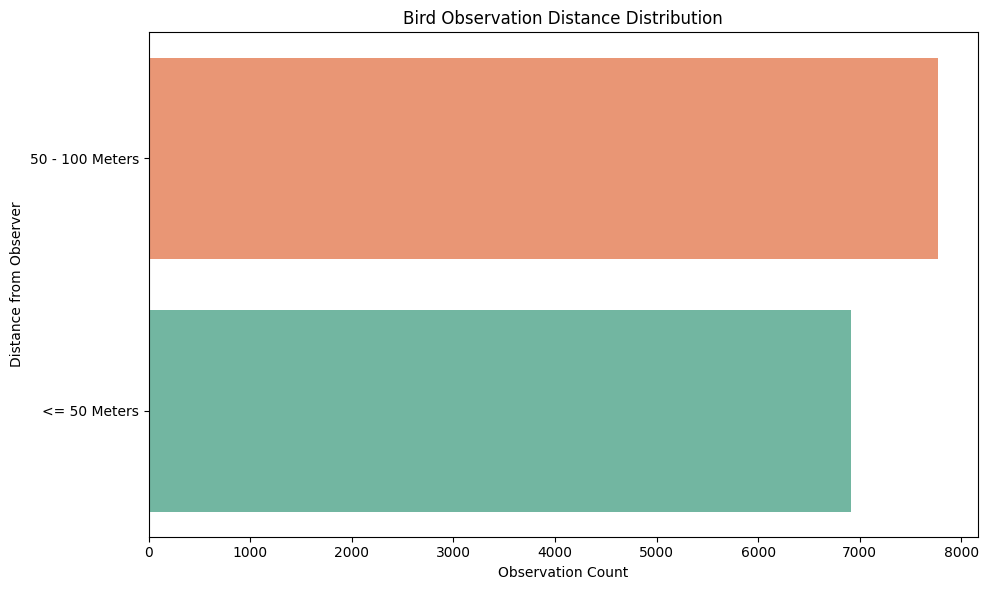

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(
    y='distance',
    data=df,
    order=df['distance'].value_counts().index,
    hue='distance',
    palette='Set2',
    legend=False
)
plt.title("Bird Observation Distance Distribution")
plt.xlabel("Observation Count")
plt.ylabel("Distance from Observer")
plt.tight_layout()
plt.show()

#### 5. Observer Trends

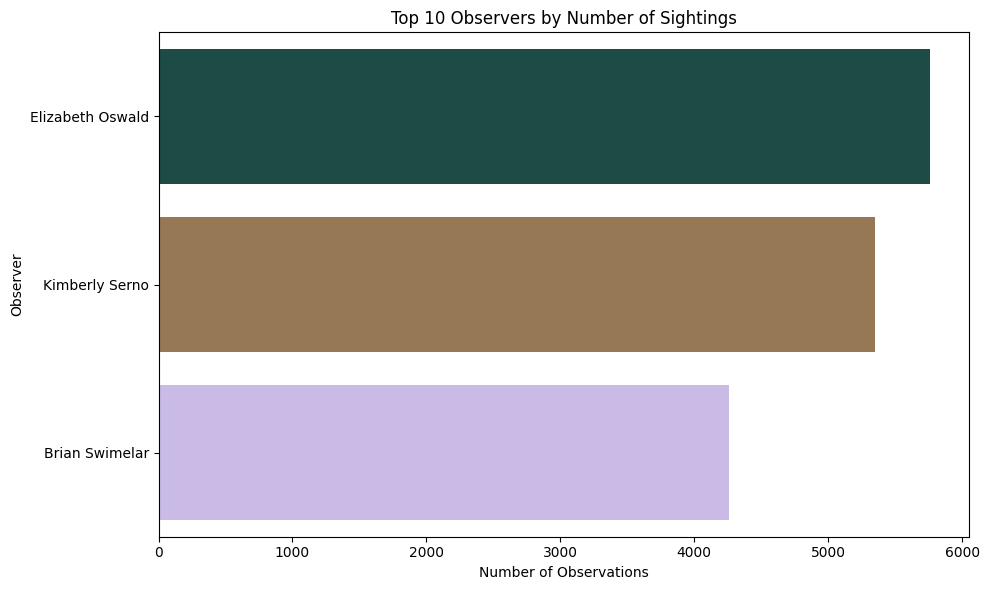

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert top observers to dataframe
top_observers_df = df['observer'].value_counts().head(10).reset_index()
top_observers_df.columns = ['observer', 'count']

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_observers_df,
    x='count',
    y='observer',
    hue='observer',
    palette='cubehelix',
    legend=False
)
plt.title("Top 10 Observers by Number of Sightings")
plt.xlabel("Number of Observations")
plt.ylabel("Observer")
plt.tight_layout()
plt.show()

In [35]:
top_species.to_csv("top_species.csv")
df.to_csv("eda_ready_data.csv", index=False)

#### 6. Temperature & Humidity

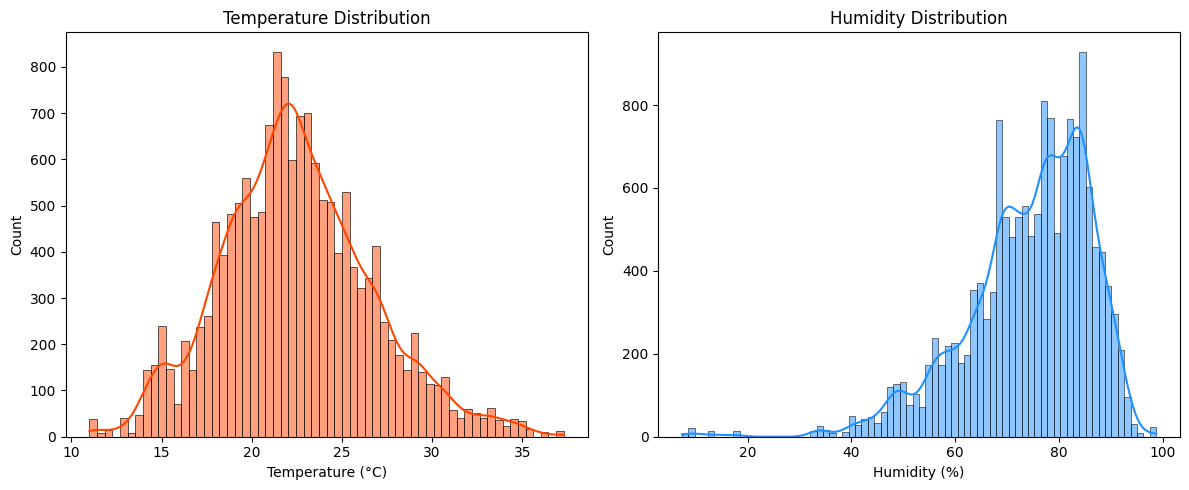

In [36]:
plt.figure(figsize=(12, 5))

# Temperature
plt.subplot(1, 2, 1)
sns.histplot(df['temperature'].dropna(), kde=True, color='orangered')
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")

# Humidity
plt.subplot(1, 2, 2)
sns.histplot(df['humidity'].dropna(), kde=True, color='dodgerblue')
plt.title("Humidity Distribution")
plt.xlabel("Humidity (%)")

plt.tight_layout()
plt.show()

#### 7. Observation Count vs. Temperature

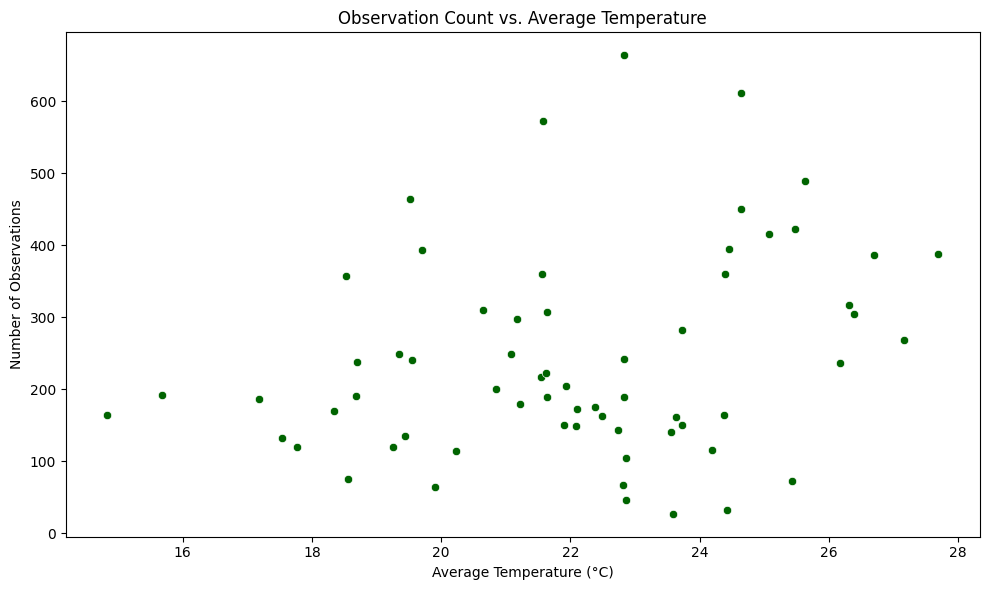

In [37]:
# Group by date and calculate mean temperature and observation count
daily_stats = df.groupby('date').agg({
    'temperature': 'mean',
    'common_name': 'count'
}).reset_index()
daily_stats.columns = ['date', 'avg_temperature', 'observation_count']

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='avg_temperature', y='observation_count', data=daily_stats, color='darkgreen')
plt.title("Observation Count vs. Average Temperature")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Number of Observations")
plt.tight_layout()
plt.show()

#### 8. Sky & Wind Condition Trends

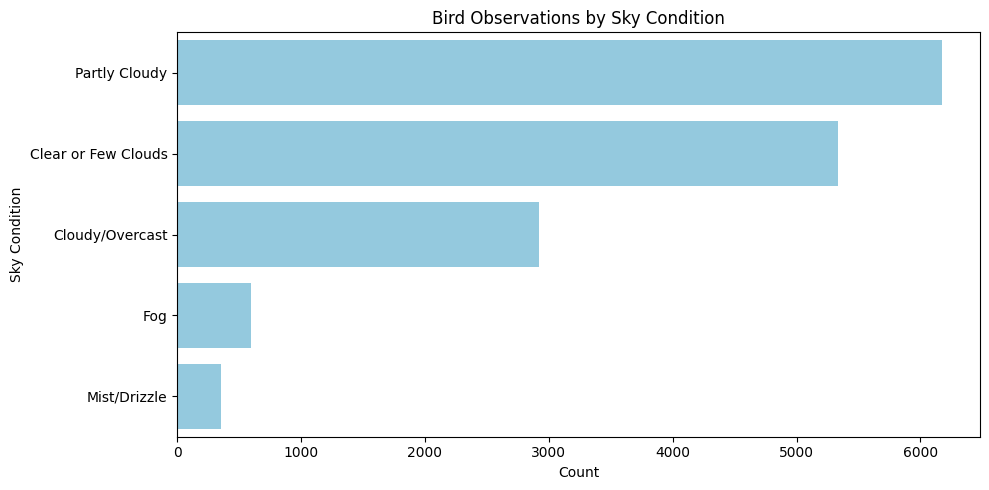

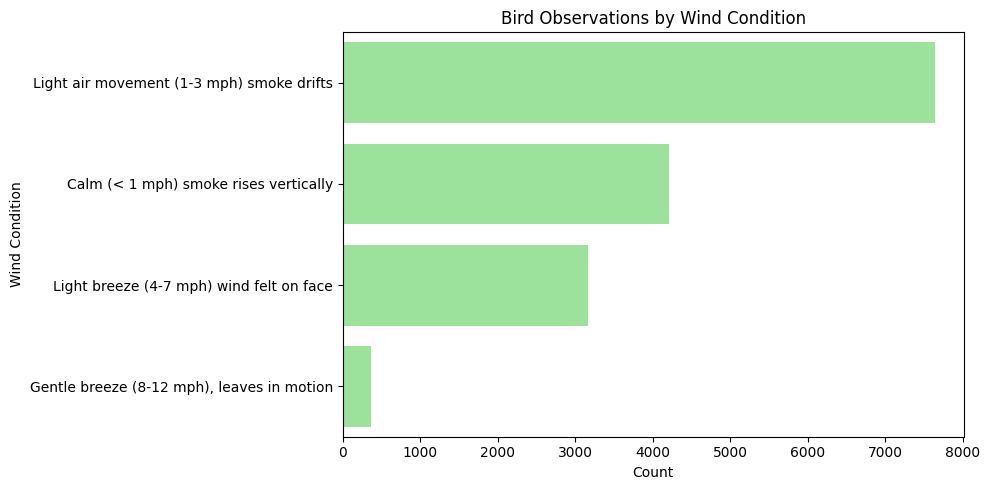

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(y='sky', data=df, order=df['sky'].value_counts().index, color='skyblue')
plt.title("Bird Observations by Sky Condition")
plt.xlabel("Count")
plt.ylabel("Sky Condition")
plt.tight_layout()
plt.show()
plt.figure(figsize=(10,5))
sns.countplot(y='wind', data=df, order=df['wind'].value_counts().index, color='lightgreen')
plt.title("Bird Observations by Wind Condition")
plt.xlabel("Count")
plt.ylabel("Wind Condition")
plt.tight_layout()
plt.show()

#### 9. Disturbance Effects

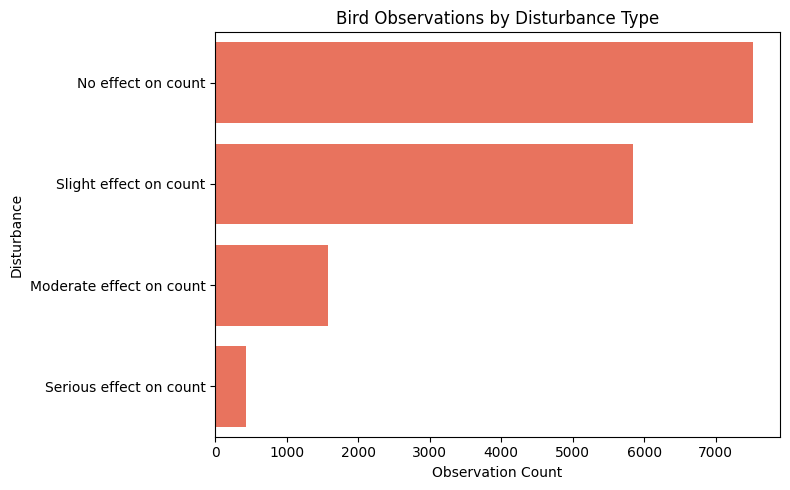

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(y='disturbance', data=df, order=df['disturbance'].value_counts().index, color='tomato')
plt.title("Bird Observations by Disturbance Type")
plt.xlabel("Observation Count")
plt.ylabel("Disturbance")
plt.tight_layout()
plt.show()

#### 10. Environmental Impact on Species Richness

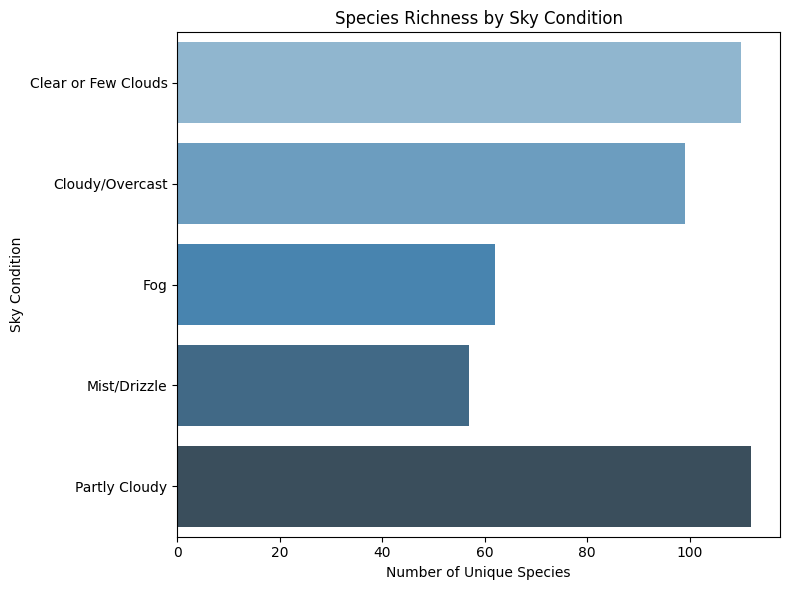

In [40]:
sky_diversity_df = df.groupby('sky')['scientific_name'].nunique().reset_index()
sky_diversity_df.columns = ['sky', 'unique_species_count']

plt.figure(figsize=(8,6))
sns.barplot(
    data=sky_diversity_df,
    x='unique_species_count',
    y='sky',
    hue='sky',
    palette='Blues_d',
    legend=False
)
plt.title("Species Richness by Sky Condition")
plt.xlabel("Number of Unique Species")
plt.ylabel("Sky Condition")
plt.tight_layout()
plt.show()

#### 11. Seasonal Trends

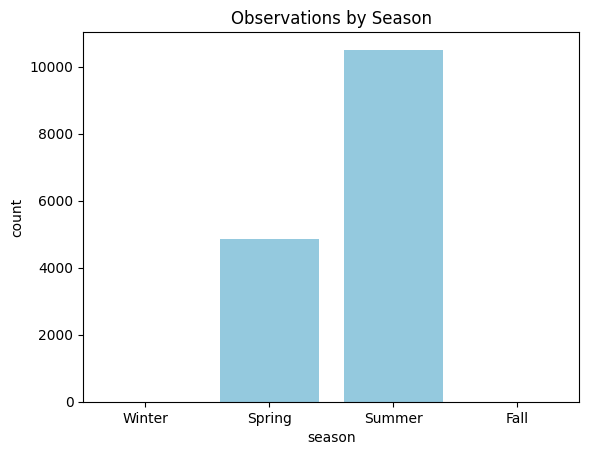

In [41]:
# Ensure month & season columns
bird_df['date'] = pd.to_datetime(bird_df['date'], errors='coerce')
bird_df['month'] = bird_df['date'].dt.month
season_map = {12: 'Winter', 1: 'Winter', 2: 'Winter',
              3: 'Spring', 4: 'Spring', 5: 'Spring',
              6: 'Summer', 7: 'Summer', 8: 'Summer',
              9: 'Fall', 10: 'Fall', 11: 'Fall'}
bird_df['season'] = bird_df['month'].map(season_map)

# Plot
sns.countplot(data=bird_df, x='season', order=['Winter','Spring','Summer','Fall'], color='skyblue')
plt.title("Observations by Season")
plt.show()


#### 12. Top Species per Season

In [44]:
top_species_season = (bird_df.groupby(['season', 'common_name'])
                      .size()
                      .reset_index(name='count')
                      .sort_values(['season', 'count'], ascending=[True, False]))

# Show top 5 per season
top_species_season.groupby('season').head(5)

,season,common_name,count
65,Spring,Northern Cardinal,375
27,Spring,Carolina Wren,303
58,Spring,Indigo Bunting,204
77,Spring,Red-bellied Woodpecker,202
78,Spring,Red-eyed Vireo,180
173,Summer,Northern Cardinal,750
135,Summer,Carolina Wren,690
188,Summer,Red-eyed Vireo,558
151,Summer,Eastern Tufted Titmouse,546
152,Summer,Eastern Wood-Pewee,422


#### 13. Flyover vs Perched Behavior

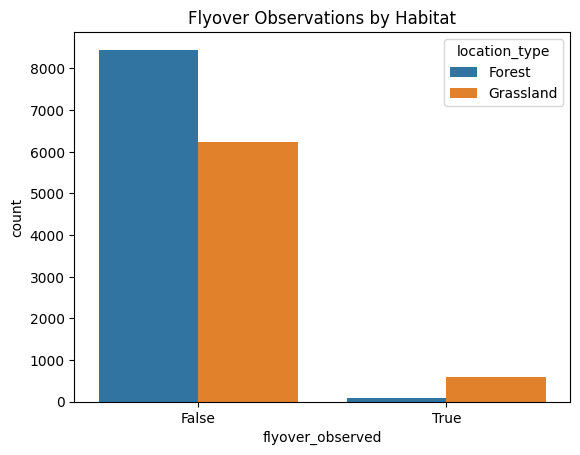

In [46]:
sns.countplot(data=bird_df, x='flyover_observed', hue='location_type')
plt.title("Flyover Observations by Habitat")
plt.show()